In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [137]:
df = pd.read_csv('/Users/tongzhu/python_projects/coaster_data/coaster_db.csv')

# Inspecting the data

In [138]:
df.shape

(1087, 56)

In [139]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [140]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [141]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

# Cleaning the data

In [142]:
# taking a subset of the original data set
df = df[['coaster_name', 
         'Location', 
         'Status', 
         'Manufacturer', 
         'year_introduced', 
         'latitude', 
         'longitude', 
         'Type_Main', 
         'opening_date_clean', 
         'speed_mph', 
         'height_ft', 
         'Inversions_clean', 
         'Gforce_clean']]

In [143]:
# renaming columns
df = df.rename(columns = {'coaster_name': 'Coaster_Name', 
                          'year_introduced': 'Year_Introduced',
                          'opening_date_clean': 'Opening_Date',
                          'speed_mph': 'Speed_mph',
                          'height_ft': 'Height_ft',
                          'Inversions_clean': 'Inversions',
                          'Gforce_clean': 'Gforce'})

In [144]:
# convert the type on `Opening_Date` to datetime
df['Opening_Date'] = pd.to_datetime(df['Opening_Date'])

In [145]:
# inspect all missing values
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [146]:
# listing all duplicated values
# duplicated() will return a boolean
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [147]:
# listing the duplicated values for 'Coaster'
df.loc[df.duplicated(subset = ['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [148]:
# filtering an example of duplicated for details
df.query('Coaster_Name == "Crystal Beach Cyclone"') 

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [149]:
# grabing the data that does not have a duplicate
df = df.loc[~df.duplicated(subset = ['Coaster_Name', 'Location', 'Opening_Date'])].reset_index(drop = True)

# Analysis and Visualization

In [150]:
# counts how many unique value occur
df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

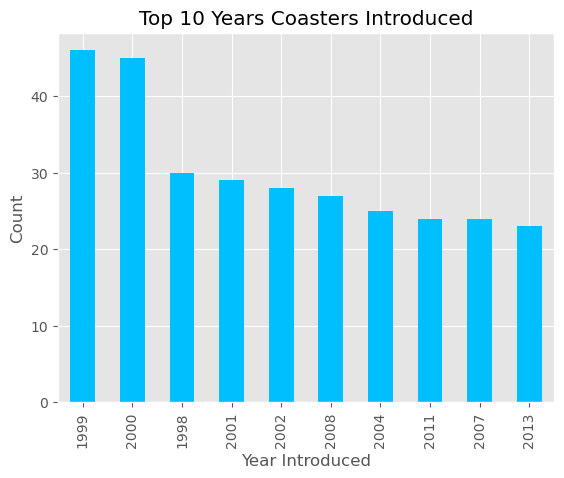

In [151]:
ax = df['Year_Introduced'].value_counts().head(10).plot(kind = 'bar', title = 'Top 10 Years Coasters Introduced', color = 'deepskyblue')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')
plt.show()

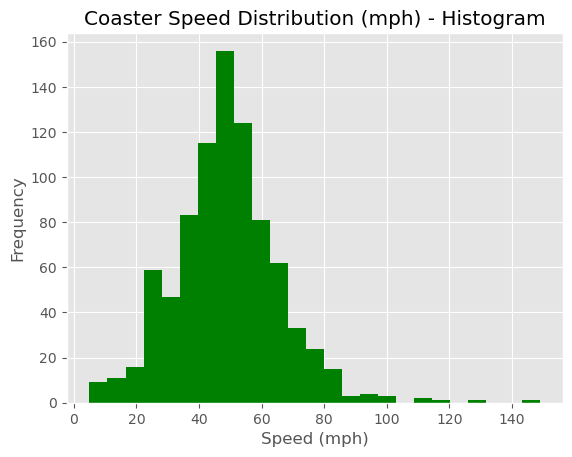

In [152]:
ax = df['Speed_mph'].plot(kind = 'hist', bins = 25, color = 'g', title = 'Coaster Speed Distribution (mph) - Histogram')
ax.set_xlabel('Speed (mph)')
plt.show()

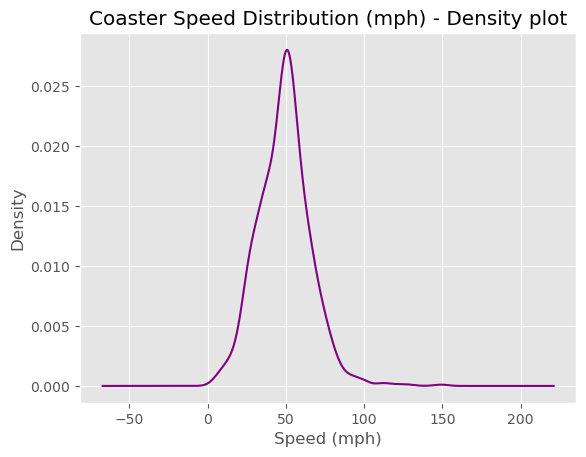

In [153]:
ax = df['Speed_mph'].plot(kind = 'kde', color = 'purple', title = 'Coaster Speed Distribution (mph) - Density plot')
ax.set_xlabel('Speed (mph)')
plt.show()

# Finding Relations

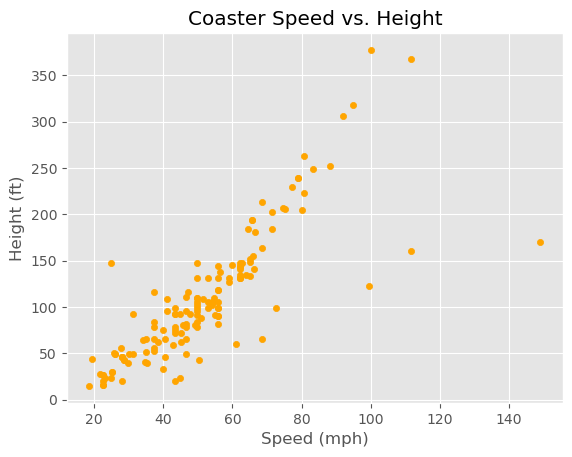

In [154]:
ax = df.plot(kind='scatter', x='Speed_mph', y='Height_ft', color='orange', title='Coaster Speed vs. Height')
ax.set_xlabel('Speed (mph)')
ax.set_ylabel('Height (ft)')
plt.show()

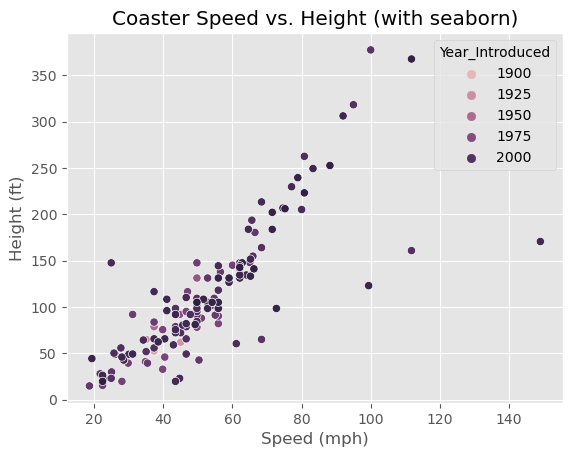

In [155]:
# same type of plot with `seaborn`
sns.scatterplot(data=df,
                x='Speed_mph',
                y='Height_ft',
                hue='Year_Introduced')
plt.title('Coaster Speed vs. Height (with seaborn)')
plt.xlabel('Speed (mph)')
plt.ylabel('Height (ft)')
plt.show()

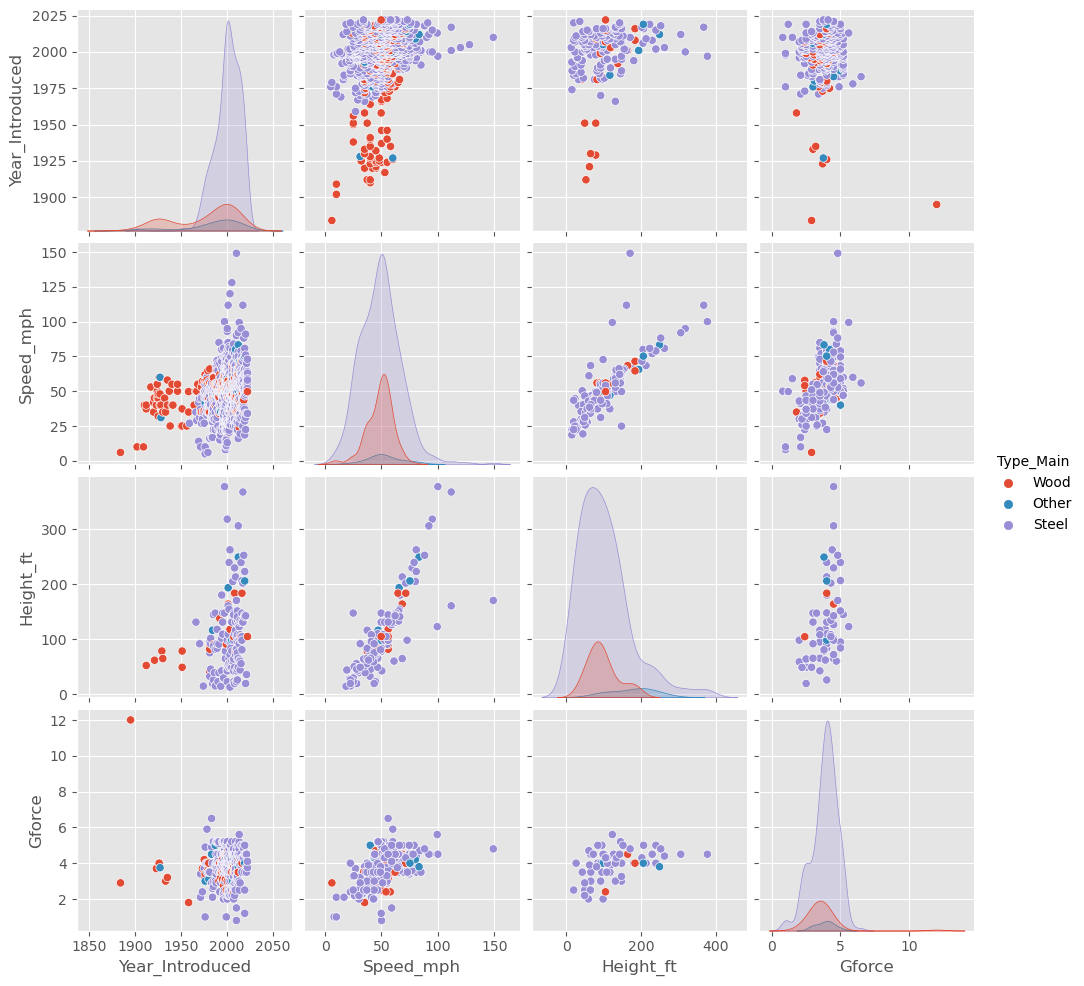

In [156]:
# pairplot
p = sns.pairplot(data=df, vars=['Year_Introduced', 'Speed_mph', 'Height_ft', 'Gforce'], hue = 'Type_Main')
plt.show()

In [157]:
# correlation matrix
df_corr=df[['Year_Introduced', 'Speed_mph', 'Height_ft', 'Gforce']].dropna().corr()
print(df_corr)

                 Year_Introduced  Speed_mph  Height_ft    Gforce
Year_Introduced         1.000000   0.171978   0.135413  0.160247
Speed_mph               0.171978   1.000000   0.733999  0.607383
Height_ft               0.135413   0.733999   1.000000  0.466482
Gforce                  0.160247   0.607383   0.466482  1.000000


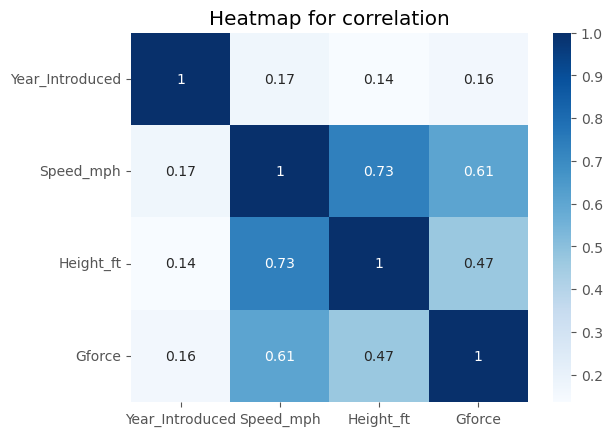

In [158]:
# heatmap
sns.heatmap(df_corr, cmap='Blues', annot=True)
plt.title('Heatmap for correlation')
plt.show()

# Problem solving

- What are the locations with the fastest roller casters (minimum of 10)?

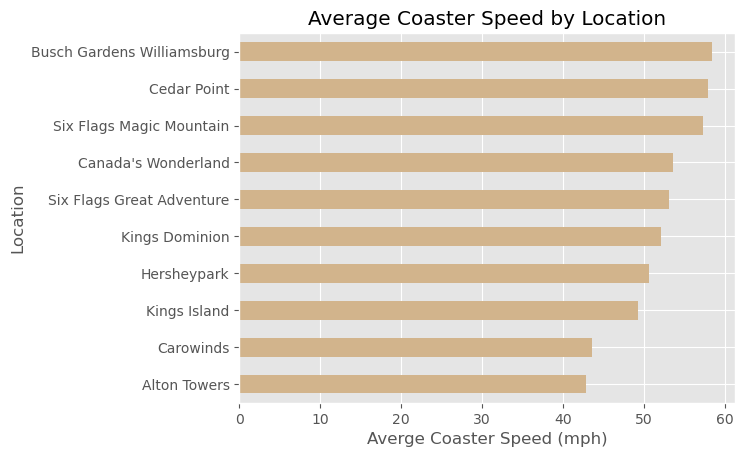

In [159]:
ax=df.query('Location != "Other"')\
    .groupby('Location')['Speed_mph']\
    .agg(['mean','count'])\
    .query('count >= 10')\
    .sort_values('mean')['mean']\
    .plot(kind='barh', color='tan', title='Average Coaster Speed by Location')
ax.set_xlabel('Averge Coaster Speed (mph)')
plt.show()